In [ ]:
import tensorflow as tf
from keras.src.losses import mean_absolute_error
from tensorflow.python.keras.callbacks import LearningRateScheduler


In [ ]:
from sklearn.datasets import make_circles

#1000 samples
n_samples = 1000

#create circle
x, y = make_circles(n_samples, noise=0.03, random_state=42)

print(f"First 5 samples of X : \n {x[:5]}")
print(f"First 5 samples of Y : \n {y[:5]}")

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

circles = pd.DataFrame({"X1": x[:, 0],
                        "X2": x[:, 1],
                        "labels": y})
circles.head(10)
plt.scatter(x=x[:, 0], y=x[:, 1], c=y, cmap=plt.cm.RdYlBu)


In [ ]:
x.shape, y.shape

In [ ]:
from keras.api.models import Sequential
from keras.api.layers import Dense
from keras.api.losses import BinaryCrossentropy
from keras.api.optimizers import SGD

tf.random.set_seed(42)
model1 = Sequential([
    Dense(1)
])
model1.compile(loss=BinaryCrossentropy(), optimizer=SGD(), metrics=['accuracy'])
model1.fit(x=x, y=y, epochs=5, verbose=2)

In [ ]:
model1.fit(x, y, epochs=200, verbose=0)  # set verbose=0 to remove training updates
model1.evaluate(x, y)

In [ ]:
tf.random.set_seed(42)
model2 = Sequential([
    Dense(1),
    Dense(1)
])
model2.compile(loss=BinaryCrossentropy(), optimizer=SGD(), metrics=['accuracy'])
model2.fit(x, y, epochs=100, verbose=0)

In [ ]:
model2.evaluate(x, y)

In [ ]:
from keras.api.optimizers import Adam

tf.random.set_seed(42)
model3 = Sequential([
    Dense(100),
    Dense(10),
    Dense(1)
])
model3.compile(loss=BinaryCrossentropy(), optimizer=Adam(), metrics=['accuracy'])
model3.fit(x, y, epochs=100, verbose=2)

In [ ]:
import numpy as np


def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    x_in = np.c_[xx.ravel(), yy.ravel()]
    y_pred = model.predict(x_in)
    if model.output_shape[-1] > 1:
        print("doing multiclass classification")
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print("doing binary classification")
        y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

In [ ]:
plot_decision_boundary(model3, x, y)

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create some regression data
X_regression = np.arange(0, 1000, 5)
y_regression = np.arange(100, 1100, 5)

# Split it into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

model3.fit(tf.expand_dims(X_reg_train, axis=-1),
           y_reg_train,
           epochs=100)


In [ ]:
from keras.api.losses import mean_absolute_error

tf.random.set_seed(42)
model3 = Sequential([
    Dense(100),
    Dense(10),
    Dense(1)
])
model3.compile(loss=mean_absolute_error, optimizer=Adam(), metrics=['mae'])
model3.fit(tf.expand_dims(X_reg_train, axis=-1),
           y_reg_train,
           epochs=100, verbose=2)


In [ ]:
y_reg_preds = model3.predict(X_reg_test)

# Plot the model's predictions against our regression data
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c='b', label='Training data')
plt.scatter(X_reg_test, y_reg_test, c='g', label='Testing data')
plt.scatter(X_reg_test, y_reg_preds.squeeze(), c='r', label='Predictions')
plt.legend();

In [ ]:
from keras.api.activations import relu, sigmoid
from keras.api.models import Sequential
from keras.api.layers import Dense
from keras.api.losses import binary_crossentropy

tf.random.set_seed(42)

model5 = Sequential([
    Dense(4, activation=relu),
    Dense(4, activation=relu),
    Dense(1, activation=sigmoid),
])
model5.compile(loss=binary_crossentropy, optimizer=Adam(), metrics=['accuracy'])
model5.fit(x, y, epochs=100, verbose=0)

In [ ]:
model5.evaluate(x, y)
plot_decision_boundary(model5, x, y)

In [ ]:

# Split data into train and test sets
X_train, y_train = x[:800], y[:800]  # 80% of the data for the training set
X_test, y_test = x[800:], y[800:]  # 20% of the data for the test set

# Check the shapes of the data
X_train.shape, X_test.shape  # 800 examples in the training set, 200 examples in the test set


In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model (same as model_7)
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    # hidden layer 1, using "relu" for activation (same as tf.keras.activations.relu)
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")  # output layer, using 'sigmoid' for the output
])

# Compile the model
model_8.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                # increase learning rate from 0.001 to 0.01 for faster learning
                metrics=['accuracy'])

# Fit the model
history = model_8.fit(X_train, y_train, epochs=25)

In [ ]:

# Evaluate our model on the test set
loss, accuracy = model_8.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {100 * accuracy:.2f}%")

In [ ]:

# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_8, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_8, X=X_test, y=y_test)
plt.show()

In [ ]:
pd.DataFrame(history.history)

In [ ]:
pd.DataFrame(history.history).plot()
plt.title("Model_8 training curves")

In [ ]:
tf.random.set_seed(42)
model9 = Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid"),
])
model9.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epochs: 1e-4 * 10 ** (epochs / 20))
history = model9.fit(X_train, y_train, epochs=100, callbacks=[lr_scheduler], verbose=2)

In [ ]:
pd.DataFrame(history.history).plot(figsize=(12, 6), xlabel="Epochs", ylabel="Loss")

In [ ]:
lrs = 1e-4 * (10 ** (np.arange(100) / 20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history.history["loss"])  # we want the x-axis (learning rate) to be log scale
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss");

In [ ]:
tf.random.set_seed(42)
model10 = Sequential([
    Dense(4, activation="relu"),
    Dense(4, activation="relu"),
    Dense(1, activation="sigmoid"),
])
model10.compile(loss="binary_crossentropy", optimizer=Adam(learning_rate=0.01), metrics=["accuracy"])
history = model10.fit(X_train, y_train, epochs=15, verbose=2)

In [ ]:
model10.evaluate(X_test, y_test)

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model10, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model10, X=X_test, y=y_test)
plt.show()

Multiclass classification

In [1]:
import tensorflow as tf
from keras.api.datasets import fashion_mnist

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [2]:
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training label: {train_labels[0]}")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [5]:
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

'Ankle boot'

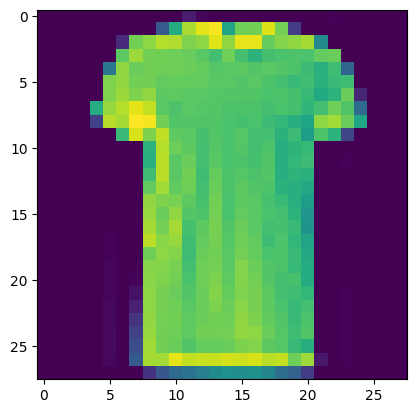

In [6]:
import matplotlib.pyplot as plt

plt.imshow(train_data[17]);

In [7]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
class_names[train_labels[0]]


'Ankle boot'

In [ ]:
plt.imshow(train_data[17], cmap=plt.cm.binary)  # change the colours to black & white
plt.title(class_names[train_labels[17]]);

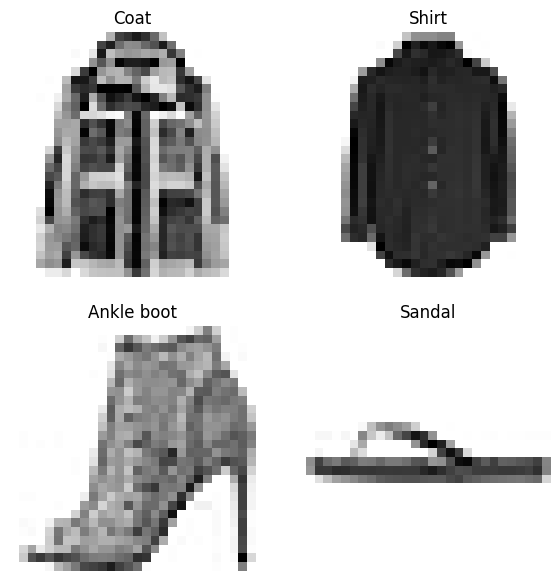

In [13]:
import random

plt.figure(figsize=(7, 7))
for i in range(4):
    ax = plt.subplot(2, 2, i + 1)
    rand_index = random.choice(range(len(train_data)))
    plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
    plt.title(class_names[train_labels[rand_index]])
    plt.axis(False)

In [21]:
from keras.api.layers import Dense, Flatten
from keras.api.losses import SparseCategoricalCrossentropy
from keras.api.models import Sequential
from keras.api.optimizers import Adam

tf.random.set_seed(42)
modell = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(4, activation="relu"),
    Dense(4, activation="relu"),
    Dense(10, activation="softmax"),
])
modell.compile(loss=SparseCategoricalCrossentropy(), optimizer=Adam(), metrics=["accuracy"])

his = modell.fit(train_data, train_labels, epochs=10, validation_data=(test_data, test_labels), verbose=2)

Epoch 1/10
1875/1875 - 2s - 1ms/step - accuracy: 0.2318 - loss: 1.9434 - val_accuracy: 0.3439 - val_loss: 1.6553
Epoch 2/10
1875/1875 - 1s - 791us/step - accuracy: 0.3594 - loss: 1.5829 - val_accuracy: 0.3765 - val_loss: 1.5265
Epoch 3/10
1875/1875 - 1s - 799us/step - accuracy: 0.3848 - loss: 1.4995 - val_accuracy: 0.3987 - val_loss: 1.4691
Epoch 4/10
1875/1875 - 2s - 807us/step - accuracy: 0.3957 - loss: 1.4581 - val_accuracy: 0.4030 - val_loss: 1.4374
Epoch 5/10
1875/1875 - 1s - 790us/step - accuracy: 0.4028 - loss: 1.4302 - val_accuracy: 0.4052 - val_loss: 1.4216
Epoch 6/10
1875/1875 - 2s - 821us/step - accuracy: 0.4101 - loss: 1.4120 - val_accuracy: 0.4141 - val_loss: 1.4056
Epoch 7/10
1875/1875 - 2s - 802us/step - accuracy: 0.4132 - loss: 1.3956 - val_accuracy: 0.4190 - val_loss: 1.3801
Epoch 8/10
1875/1875 - 1s - 797us/step - accuracy: 0.4285 - loss: 1.3482 - val_accuracy: 0.4441 - val_loss: 1.3186
Epoch 9/10
1875/1875 - 2s - 809us/step - accuracy: 0.4501 - loss: 1.2897 - val_acc

In [22]:
modell.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 4)              │         3,140 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │            50 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,632 (37.63 KB)

 Trainable params: 3,210 (12.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,422 (25.09 KB)

In [23]:
# Divide train and test images by the maximum value (normalize it)
train_data = train_data / 255.0
test_data = test_data / 255.0

In [27]:
tf.random.set_seed(42)
modell1 = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(4, activation="relu"),
    Dense(4, activation="relu"),
    Dense(10, activation="sigmoid"),
])

modell1.compile(loss=SparseCategoricalCrossentropy(), optimizer=Adam(), metrics=["accuracy"])
his1 = modell1.fit(train_data, train_labels, epochs=10, validation_data=(test_data, test_labels), verbose=2)

Epoch 1/10


D:\Artificial\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1875/1875 - 2s - 1ms/step - accuracy: 0.5500 - loss: 1.1814 - val_accuracy: 0.6814 - val_loss: 0.8560
Epoch 2/10
1875/1875 - 2s - 935us/step - accuracy: 0.7220 - loss: 0.7757 - val_accuracy: 0.7354 - val_loss: 0.7443
Epoch 3/10
1875/1875 - 2s - 930us/step - accuracy: 0.7448 - loss: 0.6997 - val_accuracy: 0.7413 - val_loss: 0.7055
Epoch 4/10
1875/1875 - 2s - 931us/step - accuracy: 0.7524 - loss: 0.6661 - val_accuracy: 0.7504 - val_loss: 0.6809
Epoch 5/10
1875/1875 - 2s - 1ms/step - accuracy: 0.7617 - loss: 0.6426 - val_accuracy: 0.7577 - val_loss: 0.6627
Epoch 6/10
1875/1875 - 2s - 899us/step - accuracy: 0.7681 - loss: 0.6280 - val_accuracy: 0.7658 - val_loss: 0.6517
Epoch 7/10
1875/1875 - 2s - 908us/step - accuracy: 0.7749 - loss: 0.6165 - val_accuracy: 0.7719 - val_loss: 0.6427
Epoch 8/10
1875/1875 - 2s - 922us/step - accuracy: 0.7811 - loss: 0.6073 - val_accuracy: 0.7762 - val_loss: 0.6363
Epoch 9/10
1875/1875 - 2s - 879us/step - accuracy: 0.7851 - loss: 0.6002 - val_accuracy: 0.7788

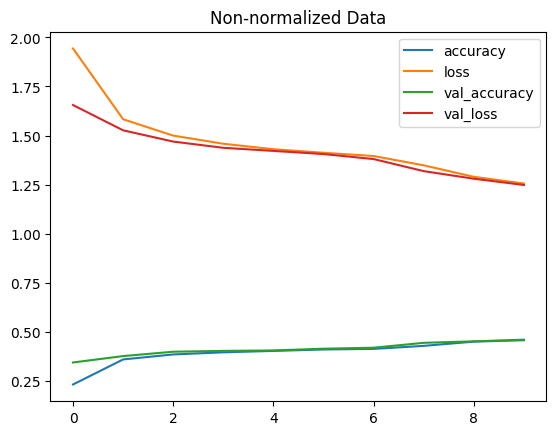

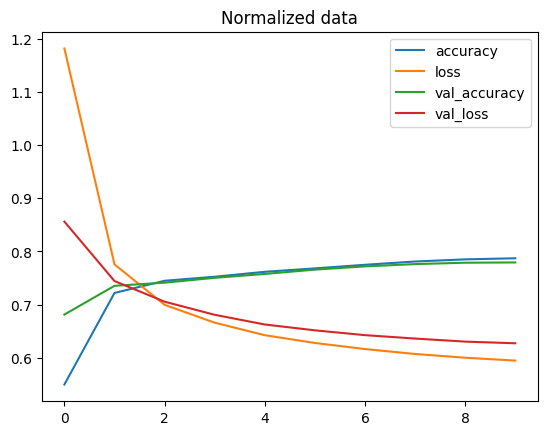

In [28]:
import pandas as pd

# Plot non-normalized data loss curves
pd.DataFrame(his.history).plot(title="Non-normalized Data")
# Plot normalized data loss curves
pd.DataFrame(his1.history).plot(title="Normalized data");

In [30]:
from keras.api.callbacks import LearningRateScheduler

tf.random.set_seed(42)
modell2 = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(4, activation="relu"),
    Dense(4, activation="relu"),
    Dense(10, activation="softmax"),
])

modell2.compile(loss=SparseCategoricalCrossentropy, optimizer=Adam(), metrics=["accuracy"])
lr_scheduler = LearningRateScheduler(lambda epochs: 1e-3 * 10 ** (epochs / 20))
his_lr = modell2.fit(train_data, train_labels, epochs=40, validation_data=(test_data, test_labels), verbose=2)

Epoch 1/40
1875/1875 - 3s - 1ms/step - accuracy: 0.6405 - loss: 0.9643 - val_accuracy: 0.7528 - val_loss: 0.6671
Epoch 2/40
1875/1875 - 2s - 959us/step - accuracy: 0.7810 - loss: 0.6008 - val_accuracy: 0.7872 - val_loss: 0.5850
Epoch 3/40
1875/1875 - 2s - 934us/step - accuracy: 0.7980 - loss: 0.5543 - val_accuracy: 0.7962 - val_loss: 0.5630
Epoch 4/40
1875/1875 - 2s - 966us/step - accuracy: 0.8063 - loss: 0.5353 - val_accuracy: 0.8024 - val_loss: 0.5509
Epoch 5/40
1875/1875 - 2s - 953us/step - accuracy: 0.8119 - loss: 0.5228 - val_accuracy: 0.8062 - val_loss: 0.5452
Epoch 6/40
1875/1875 - 2s - 944us/step - accuracy: 0.8163 - loss: 0.5135 - val_accuracy: 0.8104 - val_loss: 0.5367
Epoch 7/40
1875/1875 - 2s - 943us/step - accuracy: 0.8200 - loss: 0.5058 - val_accuracy: 0.8129 - val_loss: 0.5323
Epoch 8/40
1875/1875 - 2s - 990us/step - accuracy: 0.8227 - loss: 0.4997 - val_accuracy: 0.8157 - val_loss: 0.5284
Epoch 9/40
1875/1875 - 2s - 956us/step - accuracy: 0.8256 - loss: 0.4947 - val_acc

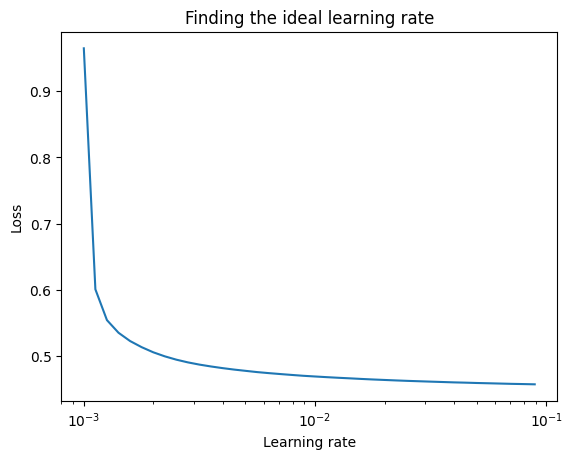

In [31]:
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * (10 ** (np.arange(40) / 20))
plt.semilogx(lrs, his_lr.history["loss"])  # want the x-axis to be log-scale
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate");

In [34]:
import itertools
from sklearn.metrics import confusion_matrix


def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
    # Create the confustion matrix
    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]  # normalize it
    n_classes = cm.shape[0]  # find the number of classes we're dealing with

    # Plot the figure and make it pretty
    fig, ax = plt.subplots(figsize=figsize)
    cax = ax.matshow(cm, cmap=plt.cm.Blues)  # colors will represent how 'correct' a class is, darker == better
    fig.colorbar(cax)

    # Are there a list of classes?
    if classes:
        labels = classes
    else:
        labels = np.arange(cm.shape[0])

    # Label the axes
    ax.set(title="Confusion Matrix",
           xlabel="Predicted label",
           ylabel="True label",
           xticks=np.arange(n_classes),  # create enough axis slots for each class
           yticks=np.arange(n_classes),
           xticklabels=labels,  # axes will labeled with class names (if they exist) or ints
           yticklabels=labels)

    # Make x-axis labels appear on bottom
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()

    # Set the threshold for different colors
    threshold = (cm.max() + cm.min()) / 2.

    # Plot the text on each cell
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j] * 100:.1f}%)",
                 horizontalalignment="center",
                 color="white" if cm[i, j] > threshold else "black",
                 size=text_size)

In [36]:
y_probs = modell2.predict(test_data)
y_probs[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step


array([[1.48723393e-06, 1.80074944e-12, 1.15260281e-08, 2.34112667e-06,
        1.43943425e-11, 1.14953965e-01, 3.61207981e-07, 1.04446016e-01,
        4.13978531e-04, 7.80181825e-01],
       [1.98934758e-05, 1.51152535e-10, 9.93047416e-01, 4.06472333e-04,
        7.64581782e-04, 0.00000000e+00, 4.77090431e-03, 1.60050825e-24,
        9.90745379e-04, 2.49133575e-38],
       [4.91104447e-06, 9.99152303e-01, 1.75375376e-08, 7.92553532e-04,
        4.97514266e-05, 0.00000000e+00, 4.21660644e-07, 2.54808939e-22,
        1.83864917e-14, 0.00000000e+00],
       [1.59926842e-07, 9.99856472e-01, 6.81752294e-11, 1.40982156e-04,
        2.30840260e-06, 0.00000000e+00, 4.28536850e-09, 6.63280526e-20,
        5.99124668e-16, 1.50600528e-36],
       [3.02789122e-01, 1.00696832e-03, 3.23969126e-02, 2.11411715e-02,
        3.88559280e-03, 1.38561800e-20, 6.38328373e-01, 4.37560238e-10,
        4.51862783e-04, 1.20923686e-14]], dtype=float32)

In [37]:
y_probs[0].argmax(), class_names[y_probs[0].argmax()]

(np.int64(9), 'Ankle boot')

In [41]:
from sklearn.metrics import confusion_matrix
y_preds = y_probs.argmax(axis=1)
confusion_matrix(y_true=test_labels,
                 y_pred=y_preds)

array([[738,   5,   9,  71,   4,   4, 154,   0,  14,   1],
       [  1, 946,   0,  31,   7,   0,  14,   0,   1,   0],
       [ 10,   2, 696,  16, 108,   0, 156,   0,  12,   0],
       [ 24,  15,  12, 864,  33,   0,  41,   0,  10,   1],
       [  0,   0, 153,  37, 698,   1, 108,   0,   3,   0],
       [  0,   0,   0,   1,   0, 894,   1,  58,   7,  39],
       [136,   2, 115,  48,  75,   1, 606,   0,  16,   1],
       [  0,   0,   0,   0,   0,  20,   0, 959,   0,  21],
       [  2,   1,   9,  11,   4,   8,  37,   4, 922,   2],
       [  1,   0,   0,   0,   0,  21,   1,  60,   2, 915]])

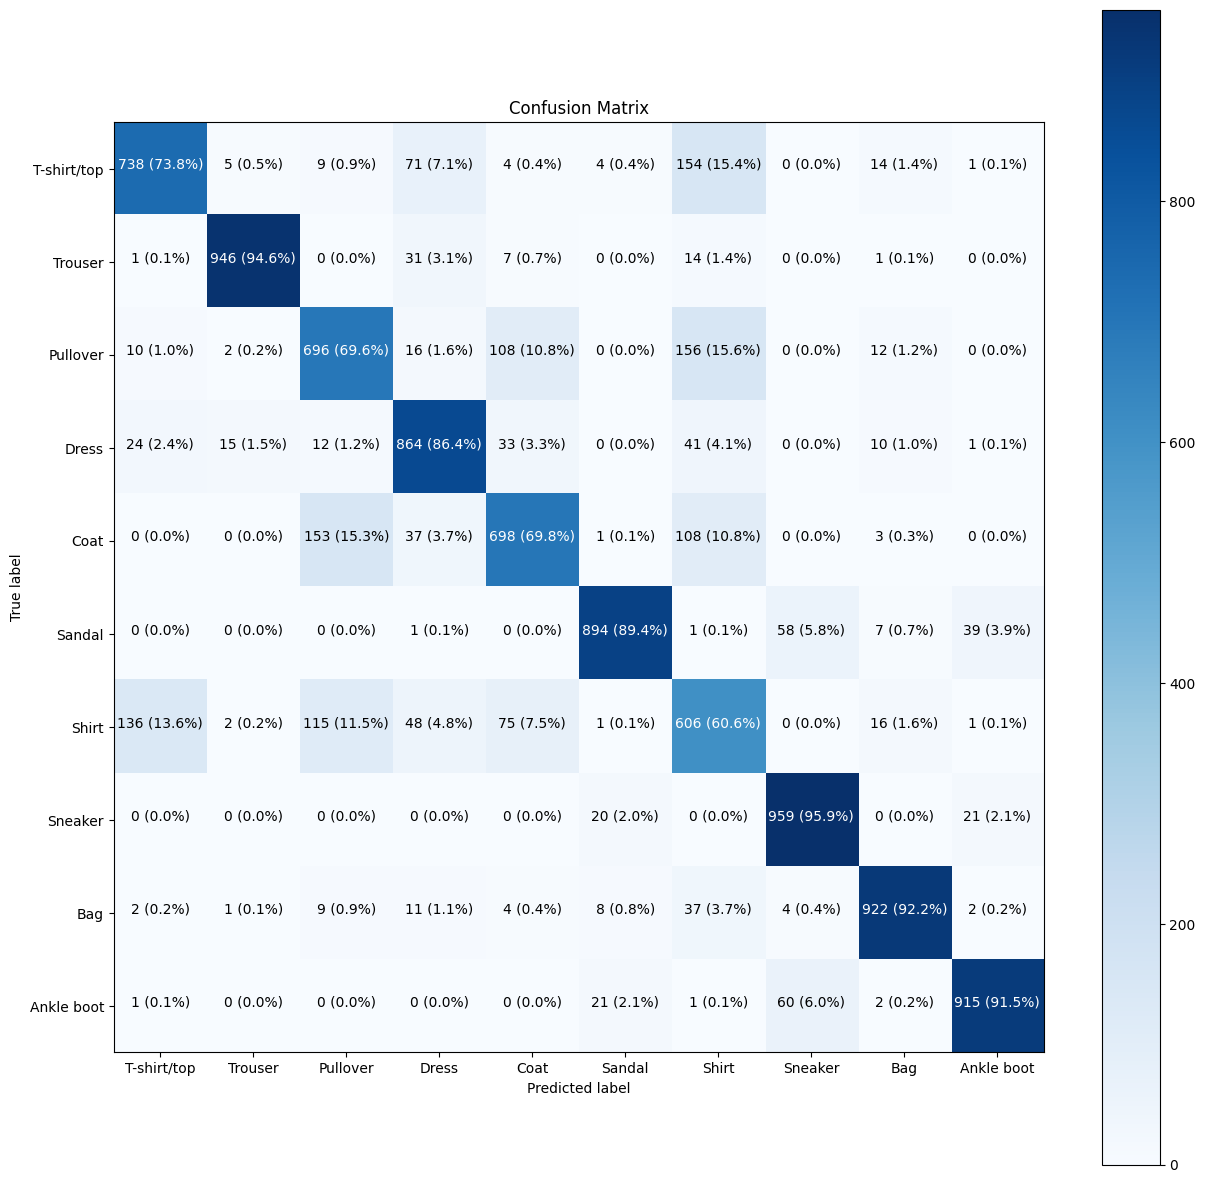

In [45]:
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

In [49]:
import random

def plot_random_image(model, images, true_labels, classes):
    i = random.randint(0, len(images))
    target_image = images[i]
    pred_probs = model.predict(target_image.reshape(1, 28, 28))
    pred_label = classes[pred_probs.argmax()]
    true_label = classes[true_labels[i]]

    plt.imshow(target_image, cmap=plt.cm.binary)

    if pred_label == true_label:
        color = "green"
    else:
        color = "red"

    plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                     100 * tf.reduce_max(pred_probs),
                                                     true_label),color=color)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


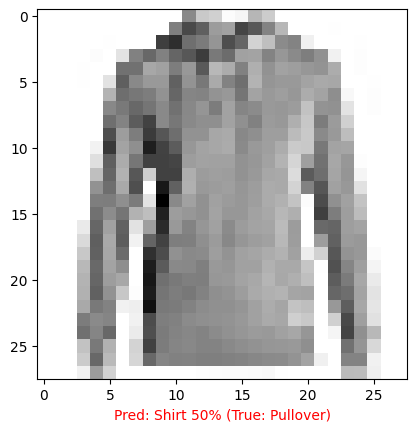

In [55]:
plot_random_image(model=modell2, images=test_data, true_labels=test_labels, classes=class_names)

In [58]:
modell2.layers

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.
